<a href="https://colab.research.google.com/github/ThitiwatJtrsn/DWDM21/blob/main/Data_Preprocessing(Chapter_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # ทำงานกับข้อมูลลักษณะ ตาราง

In [3]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os # จัดการไฟล์และ path

In [5]:
path = '/content/drive/My Drive/DWDM2021_DATA'

In [6]:
data_cases = pd.read_csv(os.path.join(path,'confirmed-cases.csv'))
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


Meta Data (Data ที่ใช้อธิบาย Data)

ชี้ข้อมูลในตาราง

# ชี้แบบธรรมดา ใช้ [ชื่ออ column][index]

In [7]:
data_cases['risk']

0         คนต่างชาติเดินทางมาจากต่างประเทศ
1         คนต่างชาติเดินทางมาจากต่างประเทศ
2         คนต่างชาติเดินทางมาจากต่างประเทศ
3         คนต่างชาติเดินทางมาจากต่างประเทศ
4         คนต่างชาติเดินทางมาจากต่างประเทศ
                        ...               
543301                    ทัณฑสถาน/เรือนจำ
543302                    ทัณฑสถาน/เรือนจำ
543303                    ทัณฑสถาน/เรือนจำ
543304                    ทัณฑสถาน/เรือนจำ
543305                                 NaN
Name: risk, Length: 543306, dtype: object

In [8]:
data_cases['risk'][678]

'สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้'

In [9]:
data_cases.iloc[-10,4]

47.0

# missing Values

In [10]:
data_cases.describe()

,No.,age
count,543305.000000,491048.000000
mean,271653.000000,35.519252
std,156838.788338,16.197363
min,1.000000,1.000000
25%,135827.000000,25.000000
50%,271653.000000,34.000000
75%,407479.000000,46.000000
max,543305.000000,108.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7fcbcb9a4bd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcbcb9b1c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcbcb9bac90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcbcb9ba750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcbcb9fe810>,
  <matplotlib.lines.Line2D at 0x7fcbcb9b1710>]}

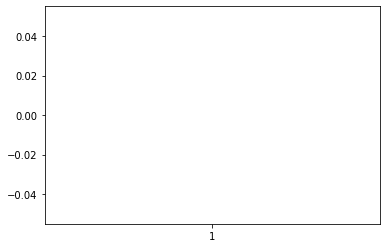

In [11]:
from matplotlib import pyplot as plt #มันมีค่า missing เลยplot ไม่ได้
plt.boxplot(data_cases['age'])

#Missing Values




*   NaN = Not a Number
*   Null
* NA = Not Available



In [12]:
data_cases.isnull()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,False,False,True,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
543301,False,False,False,False,False,False,True,False,False,False,True
543302,False,False,False,False,False,False,True,False,False,False,True
543303,False,False,False,False,False,False,True,False,False,False,True
543304,False,False,False,False,False,False,True,False,False,False,True


In [13]:
data_cases.isnull().any() #สรุปข้อมูลเป็นรายคอลัม

No.                      True
announce_date            True
Notified date            True
sex                      True
age                      True
Unit                     True
nationality              True
province_of_isolation    True
risk                     True
province_of_onset        True
district_of_onset        True
dtype: bool

#Handlind Missing Value 1 (ลบค่า missing) 

{'boxes': [<matplotlib.lines.Line2D at 0x7fcbcb501b10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcbcb507b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcbcb490b90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcbcb490650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcbcb5070d0>,
  <matplotlib.lines.Line2D at 0x7fcbcb507610>]}

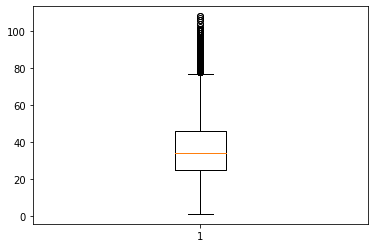

In [14]:
plt.boxplot(data_cases['age'].dropna())

In [15]:
data_cases.dropna()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
47,48.0,6/3/2020,4/3/2020,ชาย,43.0,ปี,United Kingdom,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,คลองตัน
124,125.0,6/3/2021,5/3/2021,หญิง,55.0,ปี,Thailand,ปทุมธานี,Cluster ตลาดพรพัฒน์,ปทุมธานี,ธัญบุรี
161,162.0,17/3/2020,21/3/2020,ชาย,14.0,ปี,Thailand,สุราษฎร์ธานี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุราษฎร์ธานี,เมือง
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
186,187.0,18/3/2020,16/3/2020,ชาย,36.0,ปี,Thailand,ร้อยเอ็ด,สนามมวย,ร้อยเอ็ด,เชียงขวัญ
...,...,...,...,...,...,...,...,...,...,...,...
543098,543099.0,28/7/2021,27/7/2021,หญิง,63.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นครปฐม,พุทธมณฑล
543099,543100.0,28/7/2021,27/7/2021,ชาย,67.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,หนองแขม
543100,543101.0,28/7/2021,27/7/2021,หญิง,68.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ดุสิต
543101,543102.0,28/7/2021,27/7/2021,ชาย,73.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ราษฎร์บูรณะ


In [16]:
data_cases.dropna().shape

(385643, 11)

In [17]:
data_cases.dropna().shape[0]

385643

###Quiz 3 หาว่า การทำ dropna() ทำให้ข้อมูลหายไปกี่ %




```
size before drop = 1000
size after drop = 10
we loss 99% of data
```







In [18]:
after = data_cases.shape[0] - data_cases.dropna().shape[0]
after

157663

In [19]:
data_af = (after/data_cases.shape[0])*100
data_af

29.019189922437818

เฉลย

In [20]:
removed = data_cases.shape[0] - data_cases.dropna().shape[0]

print(f'size before drop = {data_cases.shape[0]}')
print(f'size after drop = {data_cases.dropna().shape[0]}')
print(f'we lost {100*(removed/data_cases.shape[0])}% of data')

size before drop = 543306
size after drop = 385643
we lost 29.019189922437818% of data


## Handling Missing Value 1.5 (ลบค่า missing เฉพาะใน column ที่เราสนใจ)

In [21]:
data_cases_nomissingAge = data_cases.dropna(subset=['age'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fcbca9834d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcbca989510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcbca98d550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcbca989fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcbca983a50>,
  <matplotlib.lines.Line2D at 0x7fcbca983f90>]}

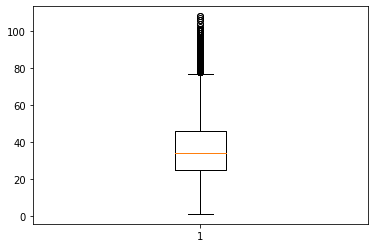

In [22]:
plt.boxplot(data_cases_nomissingAge['age'])

#Quiz3.1 หาว่าการทำ dropna() แบบเลือก drop เฉพาะ column ที่เราสนใจ (age) ทำให้ข้อมูลหายไปกี่ %

In [23]:
removed = data_cases.shape[0] - data_cases_nomissingAge.shape[0]

print(f'size before drop = {data_cases.shape[0]}')
print(f'size after drop = {data_cases_nomissingAge.shape[0]}')
print(f'we lost {100*(removed/data_cases.shape[0])}% of data')

size before drop = 543306
size after drop = 491048
we lost 9.618520686316735% of data


#Handling Misiing Value 2 (แทนค่าด้วย class ใหม่ (unknown))

In [24]:
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


In [25]:
data_cases[['risk']] = data_cases[['risk']].fillna('ไม่มีข้อมูล') #fillna เป็นการเติมค่า

In [26]:
set(data_cases['risk']) #set เหมือน set ทางคณิตศาสตร์

{'2.สัมผัสผู้ติดเชื้อ',
 'ACF รองเมือง',
 'ACF สนามกีฬาธูปะเตมีย์',
 'ACF สนามกีฬาไทย-ญี่ปุ่น',
 'ACF สีลม',
 'ACF เคหะหลักสี่',
 'Cluster Icon siam',
 "Cluster Memory 90's กรุงเทพมหานคร",
 'Cluster New Jazz กรุงเทพมหานคร',
 'Cluster The Lounge Salaya',
 'Cluster กรุงเทพมหานคร. คลองเตย',
 'Cluster คลองเตย',
 'Cluster งานมอเตอร์ โชว์',
 'Cluster จนท. สนามบินสุวรรณภูมิ',
 'Cluster จันทบุรี',
 'Cluster จันทบุรี (ชาวกินี )',
 'Cluster จันทบุรี (ชาวกินี)',
 'Cluster ชลบุรี',
 'Cluster ชลบุรี บริษัทไดกิ้น',
 'Cluster ชลบุรี โรงเบียร์ 90',
 'Cluster ตราด',
 'Cluster ตราด ',
 'Cluster ตลาดนนทบุรี',
 'Cluster ตลาดบางพลี',
 'Cluster ตลาดบางแค',
 'Cluster ตลาดบางแค/คลองขวาง',
 'Cluster ตลาดพรพัฒน์',
 'Cluster ตลาดสี่มุมเมือง',
 'Cluster ทัณฑสถานหญิงกลาง',
 'Cluster ทัณฑสถานโรงพยาบาลราชทัณฑ์',
 'Cluster ทันฑสถานบำบัดพิเศษกลาง',
 'Cluster บริษัทศรีสวัสดิ์',
 'Cluster บางแค',
 'Cluster บ่อนพัทยา/ชลบุรี',
 'Cluster บ่อนเทพารักษ์',
 'Cluster บ่อนไก่อ่างทอง',
 'Cluster ปากช่อง',
 'Cluster ผับ Thonglor'

#Handling Misiing Value 3 (แทนค่าด้วย class ใหม่ (ค่าที่เหมาะสม))

In [27]:
set(data_cases['Unit']) #คิดค่าที่เหมาะสมว่าอันไหนไม่กรอกให้แทนเป็นปี

{' วัน', ' เดือน', nan, 'ปี', 'วัน', 'เดือน'}

In [28]:
data_cases[['Unit']] = data_cases[['Unit']].fillna('ปี?') #เติมค่าลงไปเป็น ปี?

In [29]:
data_cases.isnull().any() #มาดูว่าเราจำกัดไปถึงไหนแล้ว

No.                       True
announce_date             True
Notified date             True
sex                       True
age                       True
Unit                     False
nationality               True
province_of_isolation     True
risk                     False
province_of_onset         True
district_of_onset         True
dtype: bool

## Handling Missing Value 4 (แทนด้วย ค่ากลาง)

ถ้าเป็น numeric ใช้ mean

In [30]:
data_cases[['age']].mean()

age    35.519252
dtype: float64

In [31]:
data_cases[['age']].dropna().mean()

age    35.519252
dtype: float64

In [32]:
# หา mean
avg_age = data_cases[['age']].mean()
# เติม mean ลงไปแทนค่า missing
data_cases[['age']] = data_cases[['age']].fillna(avg_age)

In [33]:
data_cases.isnull().any()

No.                       True
announce_date             True
Notified date             True
sex                       True
age                      False
Unit                     False
nationality               True
province_of_isolation     True
risk                     False
province_of_onset         True
district_of_onset         True
dtype: bool

In [34]:
data_cases[['age']].mean()

age    35.519252
dtype: float64

ถ้าเป็น norminal (ตัวหนังสือ) จะใช้ mode 

In [35]:
data_cases[['nationality']].mode()

,nationality
0,Thailand


In [36]:
data_cases[['nationality']].mode().iloc[0,0]

'Thailand'

In [37]:
data_cases['nationality'].mode()

0    Thailand
dtype: object

In [38]:
# หา mode
mode_nation = data_cases[['nationality']].mode().iloc[0,0]
# เติม mean ลงไปแทนค่า missing
data_cases[['nationality']] = data_cases[['nationality']].fillna(mode_nation)

In [39]:
data_cases.isnull().any()

No.                       True
announce_date             True
Notified date             True
sex                       True
age                      False
Unit                     False
nationality              False
province_of_isolation     True
risk                     False
province_of_onset         True
district_of_onset         True
dtype: bool

ถ้าเป็น ordinal ใช้ median

# เติมด้วยค่าของ column ใกล้เคียง (เดี๋ยวย้อนกลับมา)

In [40]:
data_cases.head(20)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
5,6.0,25/1/2020,NaN,หญิง,33.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
6,7.0,26/1/2020,NaN,หญิง,57.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
7,8.0,26/1/2020,NaN,หญิง,73.0,ปี,China,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ,ประจวบคีรีขันธ์,หัวหิน
8,9.0,28/1/2020,NaN,ชาย,63.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
9,10.0,28/1/2020,NaN,หญิง,28.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,นนทบุรี,NaN


## Handling Missing Value 5 (แทนด้วย ค่ากลางของ samples ใน class เดียวกัน)

In [41]:
data_cases2 = pd.read_csv(os.path.join(path,'confirmed-cases.csv'))
data_cases2

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


# Select data by values [PD]

การเลือก record สามารถเลือกโดยใช้ ```list ของ boolean```(ความยาวของ list เท่ากับ จำนวน record)

``` ชื่อตาราง[list ของ boolean] ```

#### สร้าง list ของ boolean

In [42]:
data_cases2['risk'] == 'ทัณฑสถาน/เรือนจำ'

0         False
1         False
2         False
3         False
4         False
          ...  
543301     True
543302     True
543303     True
543304     True
543305    False
Name: risk, Length: 543306, dtype: bool

#### นำ list ของ boolean มาเลือกค่าในตาราง

In [43]:
data_cases2[data_cases2['risk'] == 'ทัณฑสถาน/เรือนจำ']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
100018,100019.0,16/5/2021,15/5/2021,หญิง,26.0,ปี,Thailand,ฉะเชิงเทรา,ทัณฑสถาน/เรือนจำ,ฉะเชิงเทรา,เมืองฉะเชิงเทรา‎
100019,100020.0,16/5/2021,15/5/2021,หญิง,41.0,ปี,Thailand,ฉะเชิงเทรา,ทัณฑสถาน/เรือนจำ,ฉะเชิงเทรา,เมืองฉะเชิงเทรา‎
101468,101469.0,17/5/2021,16/5/2021,NaN,NaN,NaN,NaN,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
101469,101470.0,17/5/2021,16/5/2021,NaN,NaN,NaN,NaN,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
101470,101471.0,17/5/2021,16/5/2021,NaN,NaN,NaN,NaN,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543300,543301.0,28/7/2021,27/7/2021,ชาย,38.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN


สร้าง list ของ boolean

In [44]:
data_cases2['age'] > 70

0         False
1          True
2          True
3         False
4         False
          ...  
543301    False
543302    False
543303    False
543304    False
543305    False
Name: age, Length: 543306, dtype: bool

เลือก

In [45]:
data_cases2[data_cases2['age'] > 70]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
7,8.0,26/1/2020,NaN,หญิง,73.0,ปี,China,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ,ประจวบคีรีขันธ์,หัวหิน
82,83.0,15/3/2020,NaN,ชาย,76.0,ปี,Thailand,กรุงเทพมหานคร,สนามมวย,กรุงเทพมหานคร,NaN
119,120.0,16/3/2020,NaN,ชาย,73.0,ปี,Thailand,กรุงเทพมหานคร,สนามมวย,ฉะเชิงเทรา,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543095,543096.0,28/7/2021,27/7/2021,หญิง,74.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,จอมทอง
543101,543102.0,28/7/2021,27/7/2021,ชาย,73.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ราษฎร์บูรณะ
543102,543103.0,28/7/2021,27/7/2021,หญิง,106.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ประเวศ
543270,543271.0,28/7/2021,27/7/2021,ชาย,78.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN


In [46]:
blist_age70up = data_cases2['age'] > 70

In [47]:
blist_female = data_cases2['sex'] == 'หญิง'
blist_female

0          True
1          True
2          True
3         False
4          True
          ...  
543301    False
543302    False
543303    False
543304    False
543305    False
Name: sex, Length: 543306, dtype: bool

เราใช้ & (and) และ | (or) ในการรวม list ของ boolean

In [48]:
blist_age70up & blist_female

0         False
1          True
2          True
3         False
4         False
          ...  
543301    False
543302    False
543303    False
543304    False
543305    False
Length: 543306, dtype: bool

In [49]:
data_cases2[blist_age70up & blist_female]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
7,8.0,26/1/2020,NaN,หญิง,73.0,ปี,China,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ,ประจวบคีรีขันธ์,หัวหิน
476,477.0,22/3/2020,21/3/2020,หญิง,72.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ภาษีเจริญ
564,565.0,22/3/2020,21/3/2020,หญิง,71.0,ปี,Thailand,นนทบุรี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นนทบุรี,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543054,543055.0,28/7/2021,27/7/2021,หญิง,79.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ประเวศ
543086,543087.0,28/7/2021,27/7/2021,หญิง,84.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,บางบอน
543088,543089.0,28/7/2021,27/7/2021,หญิง,75.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ลาดพร้าว
543095,543096.0,28/7/2021,27/7/2021,หญิง,74.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,จอมทอง


## Quiz 4 + HW

หา records ต่อไปนี้

~~~1. records ที่ กักตัวที่ขอนแก่น~~~

~~~2. records ที่ กักตัวที่ ขอนแก่น+โคราช+อุดร~~~

~~~3. records ที่ เป็นผู้หญิงที่พบเชื้อที่ กทม~~~
4. records ที่ เป็นผู้ชาย อายุ 18-22 ปี ที่กักตัวที่เชียงใหม่



5. หาอายุเฉลี่ยของคนที่พบเชื้อที่ ขอนแก่น

1. กักตัวที่ขอนแก่น

In [50]:
data_cases2[data_cases2['province_of_isolation']=='ขอนแก่น']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
463,464.0,22/3/2020,21/3/2020,หญิง,36.0,ปี,Thailand,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,เมือง
1467,1468.0,30/3/2020,26/3/2020,ชาย,19.0,ปี,Thailand,ขอนแก่น,คนไทยเดินทางกลับจากต่างประเทศ,ขอนแก่น,เมือง
1971,1972.0,3/4/2020,31/3/2020,หญิง,70.0,ปี,Thailand,ขอนแก่น,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ขอนแก่น,เมือง
2638,2639.0,15/4/2020,14/4/2020,หญิง,63.0,ปี,Thailand,ขอนแก่น,สัมผัสผู้เดินทางจากต่างประเทศ,ขอนแก่น,น้ำพอง
...,...,...,...,...,...,...,...,...,...,...,...
535470,535471.0,28/7/2021,27/7/2021,หญิง,73.0,ปี,NaN,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,น้ำพอง
535471,535472.0,28/7/2021,27/7/2021,หญิง,22.0,ปี,NaN,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,บ้านฝาง
535472,535473.0,28/7/2021,27/7/2021,ชาย,47.0,ปี,NaN,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,ศิลา
535473,535474.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,ขอนแก่น,อื่นๆ,ขอนแก่น,เมือง


2. records ที่ กักตัวที่ ขอนแก่น+โคราช+อุดร

In [51]:
data_cases2[(data_cases2['province_of_isolation']=='ขอนแก่น') | 
            (data_cases2['province_of_isolation']=='นครราชสีมา') | 
            (data_cases2['province_of_isolation']=='อุดรธานี')]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
189,190.0,18/3/2020,16/3/2020,ชาย,57.0,ปี,Thailand,นครราชสีมา,สนามมวย,นครราชสีมา,พิมาย
207,208.0,18/3/2020,16/3/2020,หญิง,30.0,ปี,Thailand,นครราชสีมา,สถานบันเทิง,กรุงเทพมหานคร,NaN
212,213.0,18/3/2020,14/3/2020,หญิง,22.0,ปี,Thailand,นครราชสีมา,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,นครราชสีมา,วังน้ำเขียว
284,285.0,20/3/2020,17/3/2020,ชาย,42.0,ปี,Thailand,นครราชสีมา,สนามมวย,นครราชสีมา,เมืองนครราชสีมา
...,...,...,...,...,...,...,...,...,...,...,...
536858,536859.0,28/7/2021,27/7/2021,NaN,NaN,NaN,Thailand,นครราชสีมา,อยู่ระหว่างการสอบสวน,NaN,NaN
536859,536860.0,28/7/2021,27/7/2021,NaN,NaN,NaN,NaN,นครราชสีมา,อยู่ระหว่างการสอบสวน,NaN,NaN
536860,536861.0,28/7/2021,27/7/2021,NaN,NaN,NaN,Thailand,นครราชสีมา,อยู่ระหว่างการสอบสวน,NaN,NaN
536861,536862.0,28/7/2021,27/7/2021,NaN,NaN,NaN,Thailand,นครราชสีมา,อยู่ระหว่างการสอบสวน,NaN,NaN


3. records ที่ เป็นผู้หญิงที่พบเชื้อที่ กทม

In [52]:
data_cases2[(data_cases2['district_of_onset']=='กรุงเทพมหานคร') & (data_cases2['sex']=='หญิง')]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
292,293.0,20/3/2020,22/3/2020,หญิง,24.0,ปี,Thailand,กรุงเทพมหานคร,สถานบันเทิง,กรุงเทพมหานคร,กรุงเทพมหานคร
318,319.0,20/3/2020,20/3/2020,หญิง,35.0,ปี,Thailand,กรุงเทพมหานคร,สถานบันเทิง,กรุงเทพมหานคร,กรุงเทพมหานคร
1928,1929.0,3/4/2020,2/4/2020,หญิง,23.0,ปี,Thailand,พิษณุโลก,คนไทยเดินทางกลับจากต่างประเทศ,กรุงเทพมหานคร,กรุงเทพมหานคร
30541,30542.0,9/4/2021,8/4/2021,หญิง,31.0,ปี,Thailand,ชลบุรี,อยู่ระหว่างการสอบสวน,ชลบุรี,กรุงเทพมหานคร
208455,208456.0,18/6/2021,17/6/2021,หญิง,9.0,ปี,Thailand,สมุทรปราการ,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สมุทรปราการ,กรุงเทพมหานคร
...,...,...,...,...,...,...,...,...,...,...,...
526926,526927.0,28/7/2021,27/7/2021,หญิง,2.0,ปี,Thailand,เชียงราย,อื่นๆ,กรุงเทพมหานคร,กรุงเทพมหานคร
526929,526930.0,28/7/2021,27/7/2021,หญิง,37.0,ปี,Thailand,เชียงราย,อื่นๆ,กรุงเทพมหานคร,กรุงเทพมหานคร
526930,526931.0,28/7/2021,27/7/2021,หญิง,19.0,ปี,Thailand,เชียงราย,อื่นๆ,กรุงเทพมหานคร,กรุงเทพมหานคร
526932,526933.0,28/7/2021,27/7/2021,หญิง,39.0,ปี,Thailand,เชียงราย,อื่นๆ,กรุงเทพมหานคร,กรุงเทพมหานคร


4. records ที่ เป็นผู้ชาย อายุ 18-22 ปี ที่กักตัวที่เชียงใหม่

In [53]:
list_ch = data_cases2['province_of_isolation'] == 'เชียงใหม่'
list_male = data_cases2['sex'] == 'ชาย'
list_age1 =  data_cases['age'] <= 22
list_age2 =  data_cases['age'] >= 18
data_cases2[list_ch & list_male & list_age1 & list_age2]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
1407,1408.0,30/3/2020,29/3/2020,ชาย,21.0,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,เมือง
30340,30341.0,9/4/2021,8/4/2021,ชาย,22.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,เมืองเชียงใหม่
31499,31500.0,10/4/2021,9/4/2021,ชาย,22.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,NaN
31500,31501.0,10/4/2021,9/4/2021,ชาย,22.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,NaN
31501,31502.0,10/4/2021,9/4/2021,ชาย,20.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,NaN
...,...,...,...,...,...,...,...,...,...,...,...
512632,512633.0,27/7/2021,26/7/2021,ชาย,22.0,ปี,NaN,เชียงใหม่,อื่นๆ,เชียงใหม่,NaN
512648,512649.0,27/7/2021,26/7/2021,ชาย,20.0,ปี,NaN,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,หางดง
526967,526968.0,28/7/2021,27/7/2021,ชาย,18.0,ปี,NaN,เชียงใหม่,อื่นๆ,เชียงใหม่,เชียงดาว
526977,526978.0,28/7/2021,27/7/2021,ชาย,22.0,ปี,NaN,เชียงใหม่,อื่นๆ,NaN,NaN


5. หาอายุเฉลี่ยของคนที่พบเชื้อที่ ขอนแก่น

In [54]:
list_khonkaen_onset = data_cases2['province_of_onset'] == 'ขอนแก่น'
KK_onset = data_cases2[list_khonkaen_onset]
KK_onset

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
463,464.0,22/3/2020,21/3/2020,หญิง,36.0,ปี,Thailand,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,เมือง
1467,1468.0,30/3/2020,26/3/2020,ชาย,19.0,ปี,Thailand,ขอนแก่น,คนไทยเดินทางกลับจากต่างประเทศ,ขอนแก่น,เมือง
1971,1972.0,3/4/2020,31/3/2020,หญิง,70.0,ปี,Thailand,ขอนแก่น,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ขอนแก่น,เมือง
2638,2639.0,15/4/2020,14/4/2020,หญิง,63.0,ปี,Thailand,ขอนแก่น,สัมผัสผู้เดินทางจากต่างประเทศ,ขอนแก่น,น้ำพอง
...,...,...,...,...,...,...,...,...,...,...,...
536032,536033.0,28/7/2021,27/7/2021,ชาย,8.0,ปี,Thailand,หนองคาย,ระบุไม่ได้,ขอนแก่น,หนองสองห้อง
541982,541983.0,28/7/2021,27/7/2021,NaN,10.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น
542005,542006.0,28/7/2021,27/7/2021,NaN,51.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,ภูเวียง
542013,542014.0,28/7/2021,27/7/2021,NaN,38.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น


In [55]:
KK_onset[['age']].mean()

age    34.171201
dtype: float64

###เฉลย

4. records ที่ เป็นผู้ชาย อายุ 18-22 ปี ที่กักตัวที่เชียงใหม่

In [56]:
c1 = data_cases2['sex'] == 'ชาย'
c2 = data_cases2['age'] >= 18
c3 = data_cases2['age'] <= 22
c4 = data_cases2['province_of_isolation'] == 'เชียงใหม่'

data_cases2[c1 & c2 & c3 & c4]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
1407,1408.0,30/3/2020,29/3/2020,ชาย,21.0,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,เมือง
30340,30341.0,9/4/2021,8/4/2021,ชาย,22.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,เมืองเชียงใหม่
31499,31500.0,10/4/2021,9/4/2021,ชาย,22.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,NaN
31500,31501.0,10/4/2021,9/4/2021,ชาย,22.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,NaN
31501,31502.0,10/4/2021,9/4/2021,ชาย,20.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,NaN
...,...,...,...,...,...,...,...,...,...,...,...
512632,512633.0,27/7/2021,26/7/2021,ชาย,22.0,ปี,NaN,เชียงใหม่,อื่นๆ,เชียงใหม่,NaN
512648,512649.0,27/7/2021,26/7/2021,ชาย,20.0,ปี,NaN,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,หางดง
526967,526968.0,28/7/2021,27/7/2021,ชาย,18.0,ปี,NaN,เชียงใหม่,อื่นๆ,เชียงใหม่,เชียงดาว
526977,526978.0,28/7/2021,27/7/2021,ชาย,22.0,ปี,NaN,เชียงใหม่,อื่นๆ,NaN,NaN


5. หาอายุเฉลี่ยของคนที่พบเชื้อที่ ขอนแก่น

In [57]:
KK_cases = data_cases2['province_of_onset'] == 'ขอนแก่น'
KK_mean = data_cases2[KK_cases]['age'].mean()
KK_mean

34.17120146744115

##### พบที่ขอนแก่น

In [58]:
data_cases2[KK_cases]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
463,464.0,22/3/2020,21/3/2020,หญิง,36.0,ปี,Thailand,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,เมือง
1467,1468.0,30/3/2020,26/3/2020,ชาย,19.0,ปี,Thailand,ขอนแก่น,คนไทยเดินทางกลับจากต่างประเทศ,ขอนแก่น,เมือง
1971,1972.0,3/4/2020,31/3/2020,หญิง,70.0,ปี,Thailand,ขอนแก่น,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ขอนแก่น,เมือง
2638,2639.0,15/4/2020,14/4/2020,หญิง,63.0,ปี,Thailand,ขอนแก่น,สัมผัสผู้เดินทางจากต่างประเทศ,ขอนแก่น,น้ำพอง
...,...,...,...,...,...,...,...,...,...,...,...
536032,536033.0,28/7/2021,27/7/2021,ชาย,8.0,ปี,Thailand,หนองคาย,ระบุไม่ได้,ขอนแก่น,หนองสองห้อง
541982,541983.0,28/7/2021,27/7/2021,NaN,10.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น
542005,542006.0,28/7/2021,27/7/2021,NaN,51.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,ภูเวียง
542013,542014.0,28/7/2021,27/7/2021,NaN,38.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น


#### เอาค่า mean ไปเติมตรง missing column 'age'

In [59]:
data_KK = data_cases2[KK_cases]
data_KK.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                       True
age                       True
Unit                      True
nationality               True
province_of_isolation    False
risk                      True
province_of_onset        False
district_of_onset         True
dtype: bool

In [60]:
data_KK[['age']] = data_KK[['age']].fillna(KK_mean)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [61]:
data_KK.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                       True
age                      False
Unit                      True
nationality               True
province_of_isolation    False
risk                      True
province_of_onset        False
district_of_onset         True
dtype: bool

In [62]:
data_KK

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
463,464.0,22/3/2020,21/3/2020,หญิง,36.0,ปี,Thailand,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,เมือง
1467,1468.0,30/3/2020,26/3/2020,ชาย,19.0,ปี,Thailand,ขอนแก่น,คนไทยเดินทางกลับจากต่างประเทศ,ขอนแก่น,เมือง
1971,1972.0,3/4/2020,31/3/2020,หญิง,70.0,ปี,Thailand,ขอนแก่น,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ขอนแก่น,เมือง
2638,2639.0,15/4/2020,14/4/2020,หญิง,63.0,ปี,Thailand,ขอนแก่น,สัมผัสผู้เดินทางจากต่างประเทศ,ขอนแก่น,น้ำพอง
...,...,...,...,...,...,...,...,...,...,...,...
536032,536033.0,28/7/2021,27/7/2021,ชาย,8.0,ปี,Thailand,หนองคาย,ระบุไม่ได้,ขอนแก่น,หนองสองห้อง
541982,541983.0,28/7/2021,27/7/2021,NaN,10.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น
542005,542006.0,28/7/2021,27/7/2021,NaN,51.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,ภูเวียง
542013,542014.0,28/7/2021,27/7/2021,NaN,38.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น


เติมค่า mean แทน missing ของ เชียงใหม่

In [63]:
# หาค่า mean ของเชียงใหม่
CM_cases = data_cases2['province_of_onset'] == 'เชียงใหม่'
CM_mean = data_cases2[CM_cases]['age'].mean()

# เลือกมาเฉพาะ data เชียงใหม่
data_CM = data_cases2[CM_cases]

# เติมค่า mean แทน missing
data_CM[['age']] = data_CM[['age']].fillna(CM_mean)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [64]:
data_CM

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
16,17.0,31/1/2020,NaN,ชาย,28.00000,ปี,China,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,หางดง
91,92.0,15/3/2020,NaN,ชาย,37.00000,ปี,Thailand,เชียงใหม่,สนามมวย,เชียงใหม่,แม่ริม
185,186.0,18/3/2020,NaN,ชาย,31.00000,ปี,Thailand,เชียงใหม่,สนามมวย,เชียงใหม่,นครพิงค์
192,193.0,18/3/2020,NaN,ชาย,32.00000,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,NaN
252,253.0,19/3/2020,NaN,ชาย,25.00000,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,NaN
...,...,...,...,...,...,...,...,...,...,...,...
526996,526997.0,28/7/2021,27/7/2021,ชาย,32.00000,ปี,NaN,เชียงใหม่,อื่นๆ,เชียงใหม่,แม่วาง
526998,526999.0,28/7/2021,27/7/2021,ชาย,27.00000,ปี,NaN,เชียงใหม่,อื่นๆ,เชียงใหม่,เมืองเชียงใหม่
535869,535870.0,28/7/2021,27/7/2021,ชาย,20.00000,ปี,Thailand,นครพนม,ระบุไม่ได้,เชียงใหม่,เชียงดาว
541968,541969.0,28/7/2021,27/7/2021,NaN,31.78646,NaN,NaN,กรุงเทพมหานคร,อื่นๆ,เชียงใหม่,สันป่าตอง


## ต่อตารางแนวแกน Y [PD]

In [65]:
data_CMKK = pd.concat([data_CM,data_KK])
data_CMKK

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
16,17.0,31/1/2020,NaN,ชาย,28.0,ปี,China,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,หางดง
91,92.0,15/3/2020,NaN,ชาย,37.0,ปี,Thailand,เชียงใหม่,สนามมวย,เชียงใหม่,แม่ริม
185,186.0,18/3/2020,NaN,ชาย,31.0,ปี,Thailand,เชียงใหม่,สนามมวย,เชียงใหม่,นครพิงค์
192,193.0,18/3/2020,NaN,ชาย,32.0,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,NaN
252,253.0,19/3/2020,NaN,ชาย,25.0,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,NaN
...,...,...,...,...,...,...,...,...,...,...,...
536032,536033.0,28/7/2021,27/7/2021,ชาย,8.0,ปี,Thailand,หนองคาย,ระบุไม่ได้,ขอนแก่น,หนองสองห้อง
541982,541983.0,28/7/2021,27/7/2021,NaN,10.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น
542005,542006.0,28/7/2021,27/7/2021,NaN,51.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,ภูเวียง
542013,542014.0,28/7/2021,27/7/2021,NaN,38.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น


## Handling Missing Value 5 (แทนด้วย ค่ากลางของ samples ใน class เดียวกัน) (ต่อ)

In [66]:
data_cases2

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


เติมค่า missing ให้ จังหวัดก่อน

In [67]:
data_cases2[['province_of_onset']] = data_cases2[['province_of_onset']].fillna('ไม่มีข้อมูล')

หาจังหวัดทั้งหมด

In [68]:
all_cities = set(data_cases2['province_of_onset'])
all_cities

{'กระบี่',
 'กรุงเทพมหานคร',
 'กัมพูชา',
 'กาญจนบุรี',
 'กาฬสินธิ์',
 'กาฬสินธุ์',
 'กาฬสินธ์ุ',
 'กาฬสิินธุ์',
 'กำแพงเพชร',
 'ขอนแก่น',
 'ขอนแก่่น',
 'จ.ปัตตานี',
 'จังหวัดร้อยเอ็ด',
 'จันทบุรี',
 'ฉะเชิงเทรา',
 'ชลบุรี',
 'ชลบุุรี',
 'ชัยนาท',
 'ชัยภูมิ',
 'ชััยภูมิ',
 'ชุมพร',
 'ชุุมพร',
 'ตรัง',
 'ตราด',
 'ตาก',
 'ธารโต',
 'นคนปฐม',
 'นคปฐม',
 'นครนาชสีมา',
 'นครนายก',
 'นครปฐม',
 'นครประฐม',
 'นครพนม',
 'นครราชธสีมา',
 'นครราชสีมา',
 'นครศรธรรมาช',
 'นครศรี',
 'นครศรีธรรมราช',
 'นครศรีธรรรมราช',
 'นครศรีราชสีมา',
 'นครศรีีธรรมราช',
 'นครสวรรค์',
 'นครสววรค์',
 'นตรปฐม',
 'นนทบุรี',
 'นนทุบรี',
 'นราธิวาส',
 'นาราธิวาส',
 'นาวัง',
 'น่าน',
 'บางกะปิ',
 'บึงกาฬ',
 'บึงโขงหลง',
 'บึึงกาฬ',
 'บุรีรัมย์',
 'บุรีรัยม์',
 'บ้านหลวง',
 'ปทุมทานี',
 'ปทุมธานี',
 'ปทุมธานีี',
 'ปทุุมธานี',
 'ประจวบครีขันธ์',
 'ประจวบคีรีขันธื',
 'ประจวบคีรีขันธ์',
 'ปราจีนบุรี',
 'ปลายพระยา',
 'ปัตตานี',
 'ปัตตานี\u200b',
 'ปัว',
 'พม่า',
 'พระนครศรียุธยา',
 'พระนครศรีอยุทธยา',
 'พระนครศรีอยุธนา',
 'พระนคร

In [69]:
fixed_cities = []

for city in all_cities:
    # หาค่า mean ของเชียงใหม่
    X_cases = data_cases2['province_of_onset'] == city
    X_mean = data_cases2[X_cases]['age'].mean()

    # เลือกมาเฉพาะ data เชียงใหม่
    data_X = data_cases2[X_cases]

    # เติมค่า mean แทน missing
    data_X[['age']] = data_X[['age']].fillna(X_mean)

    fixed_cities.append(data_X)


data_cases2_nomissingage = pd.concat(fixed_cities)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [70]:
data_cases2_nomissingage

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
358671,358672.0,14/7/2021,13/7/2021,หญิง,52.0,ปี,NaN,ขอนแก่น,อื่นๆ,สมุทปราการ,พระประแดง
358672,358673.0,14/7/2021,13/7/2021,ชาย,57.0,ปี,NaN,ขอนแก่น,อื่นๆ,สมุทปราการ,พระประแดง
505498,505499.0,26/7/2021,25/7/2021,ชาย,24.0,ปี,Thailand,กาฬสินธุ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สมุทปราการ,บางเสาธง
945,946.0,26/3/2020,25/3/2020,ชาย,43.0,ปี,Thailand,นครสวรรค์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นครสวรรค์,เมืองนครสวรรค์
1058,1059.0,27/3/2020,26/3/2020,หญิง,23.0,ปี,Thailand,นครสวรรค์,คนไทยเดินทางกลับจากต่างประเทศ,นครสวรรค์,บรรพตพิสัย
...,...,...,...,...,...,...,...,...,...,...,...
541733,541734.0,28/7/2021,27/7/2021,NaN,61.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,กาฬสินธุ์,นาคู
541780,541781.0,28/7/2021,27/7/2021,NaN,48.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,กาฬสินธุ์,สมเด็จ
541814,541815.0,28/7/2021,27/7/2021,NaN,27.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,กาฬสินธุ์,สหัสขันธ์
541815,541816.0,28/7/2021,27/7/2021,NaN,49.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,กาฬสินธุ์,สหัสขันธ์


In [71]:
data_cases2_nomissingage.isnull().any()

No.                       True
announce_date             True
Notified date             True
sex                       True
age                       True
Unit                      True
nationality               True
province_of_isolation     True
risk                      True
province_of_onset        False
district_of_onset         True
dtype: bool

เติม mean  ของทั้งตาราง ให้กับ missing ที่ยังเหลืออยู่

In [72]:
data_cases2_nomissingage[['age']] = data_cases2_nomissingage[['age']].fillna(data_cases2_nomissingage['age'].mean())

In [73]:
data_cases2_nomissingage.isnull().any()

No.                       True
announce_date             True
Notified date             True
sex                       True
age                      False
Unit                      True
nationality               True
province_of_isolation     True
risk                      True
province_of_onset        False
district_of_onset         True
dtype: bool

In [74]:
data_cases2_nomissingage

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
358671,358672.0,14/7/2021,13/7/2021,หญิง,52.0,ปี,NaN,ขอนแก่น,อื่นๆ,สมุทปราการ,พระประแดง
358672,358673.0,14/7/2021,13/7/2021,ชาย,57.0,ปี,NaN,ขอนแก่น,อื่นๆ,สมุทปราการ,พระประแดง
505498,505499.0,26/7/2021,25/7/2021,ชาย,24.0,ปี,Thailand,กาฬสินธุ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สมุทปราการ,บางเสาธง
945,946.0,26/3/2020,25/3/2020,ชาย,43.0,ปี,Thailand,นครสวรรค์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นครสวรรค์,เมืองนครสวรรค์
1058,1059.0,27/3/2020,26/3/2020,หญิง,23.0,ปี,Thailand,นครสวรรค์,คนไทยเดินทางกลับจากต่างประเทศ,นครสวรรค์,บรรพตพิสัย
...,...,...,...,...,...,...,...,...,...,...,...
541733,541734.0,28/7/2021,27/7/2021,NaN,61.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,กาฬสินธุ์,นาคู
541780,541781.0,28/7/2021,27/7/2021,NaN,48.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,กาฬสินธุ์,สมเด็จ
541814,541815.0,28/7/2021,27/7/2021,NaN,27.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,กาฬสินธุ์,สหัสขันธ์
541815,541816.0,28/7/2021,27/7/2021,NaN,49.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,กาฬสินธุ์,สหัสขันธ์


## การเรียงข้อมูล [PD]

In [75]:
data_cases2_nomissingage = data_cases2_nomissingage.sort_values(by=['No.'])

In [76]:
data_cases2_nomissingage

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.000000,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.000000,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.000000,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


# Outlier

In [77]:
from matplotlib import pyplot as plt

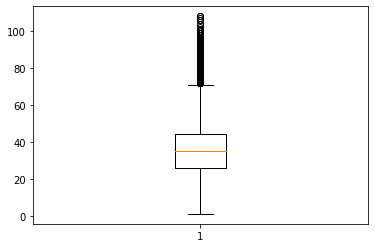

In [78]:
data_dict = plt.boxplot(data_cases2_nomissingage['age'])

In [79]:
data_dict # curly brackets

{'boxes': [<matplotlib.lines.Line2D at 0x7fcbca69f910>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcbca6af9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcbca64a810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcbca64a110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcbca69ff10>,
  <matplotlib.lines.Line2D at 0x7fcbca6af490>]}

In [80]:
data_dict['boxes']

In [81]:
data_dict['boxes'][0]

In [82]:
data_dict['boxes'][0].get_ydata()

array([26., 26., 44., 44., 26.])

In [83]:
Q1 = data_dict['boxes'][0].get_ydata()[0]

In [84]:
Q1

26.0

In [85]:
data_dict['fliers'][0].get_ydata()

array([ 74.,  73.,  73., ..., 106.,  78.,  72.])

In [86]:
data_dict['caps'][0].get_ydata()

array([1., 1.])

In [87]:
data_dict['caps'][0].get_ydata()[0]

1.0

In [88]:
data_dict['caps'][1].get_ydata()

array([71., 71.])

In [89]:
cap1 = data_cases2_nomissingage['age'] >= data_dict['caps'][0].get_ydata()[0]
cap2 = data_cases2_nomissingage['age'] <= data_dict['caps'][1].get_ydata()[0]

data_cases2_nomissingage_nooutlier = data_cases2_nomissingage[cap1 & cap2]
data_cases2_nomissingage_nooutlier

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
3,4.0,22/1/2020,NaN,ชาย,68.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.000000,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
5,6.0,25/1/2020,NaN,หญิง,33.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
6,7.0,26/1/2020,NaN,หญิง,57.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.000000,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


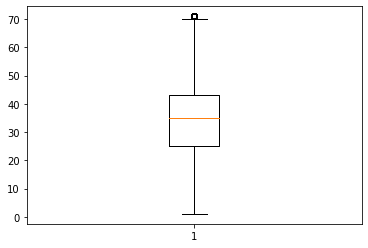

In [90]:
data_dict = plt.boxplot(data_cases2_nomissingage_nooutlier['age'])

ตัด outlier แบบ manual

In [91]:
data_cases2_nomissingage[data_cases2_nomissingage['province_of_onset'] != 'ลอง']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.000000,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.000000,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.000000,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


# Quiz 5

เขียนฟังก์ชั่น คำนวณ หา Q1,Q2,Q3,IQR,min,max โดยรับ input เป็น output ของ boxplot

```python
def box_vals(box_out_dict):
    #your code1
    .
    .
    .
    #your codex
    return q1,q2,q3,iqr,vmin,vmix
```
